# Minimum filter on 3-neighbourhood with native mpi approach

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from utils import load_dataset, aggregate, plot_quantiles, plot_surface, plot_common
import matplotlib.pyplot as plt
from IPython.display import Markdown

algorithm = 'minfilter3d'
legend = "2048x2048x{n}"
method = 'nativempi'
pd.set_option('display.max_rows', 10000)
data = load_dataset('csv', r'minfilter_test_2048x2048x[0-9]+_')
data = data[data['size'].isin([1, 2, 4, 6, 8]) & data['image_size'].isin([10, 50, 100, 500, 1000])]

In [2]:
aggregate(data, method=method, stat='total_op', aggfunc='median', print=True)

## All measured data

size                          1        2        4        6        8
image_size round rank                                              
10.0       0     0       1194.0   1019.0    847.0    843.0    992.0
                 1          NaN   1004.0    899.0    881.0   1042.0
                 2          NaN      NaN    826.0    896.0   1065.0
                 3          NaN      NaN    870.0    867.0   1086.0
                 4          NaN      NaN      NaN    915.0   1092.0
                 5          NaN      NaN      NaN    857.0   1057.0
                 6          NaN      NaN      NaN      NaN   1020.0
                 7          NaN      NaN      NaN      NaN   1012.0
           1     0       1189.0    845.0    840.0    896.0   1093.0
                 1          NaN    831.0    797.0    921.0   1166.0
                 2          NaN      NaN    815.0    936.0   1149.0
                 3          NaN      NaN    824.0    906.0   1083.0
                 4          NaN      NaN      NaN    869.0   1064.0
                 5          NaN      NaN      NaN    887.0   1125.0
                 6          NaN      NaN      NaN      NaN   1135.0
                 7          NaN      NaN      NaN      NaN   1110.0
           2     0       1199.0    966.0    809.0    912.0   1130.0
                 1          NaN    982.0    794.0    924.0   1086.0
                 2          NaN      NaN    778.0    943.0   1072.0
                 3          NaN      NaN    821.0    856.0   1118.0
                 4          NaN      NaN      NaN    894.0   1102.0
                 5          NaN      NaN      NaN    868.0   1046.0
                 6          NaN      NaN      NaN      NaN   1060.0
                 7          NaN      NaN      NaN      NaN   1145.0
           3     0       1173.0   1072.0    746.0    857.0    996.0
                 1          NaN   1087.0    769.0    889.0   1100.0
                 2          NaN      NaN    757.0    830.0   1088.0
                 3          NaN      NaN    732.0    865.0   1046.0
                 4          NaN      NaN      NaN    893.0   1021.0
                 5          NaN      NaN      NaN    916.0   1060.0
                 6          NaN      NaN      NaN      NaN   1073.0
                 7          NaN      NaN      NaN      NaN   1018.0
           4     0       2192.0    848.0    835.0    910.0   1077.0
                 1          NaN    864.0    846.0    963.0    992.0
                 2          NaN      NaN    865.0    904.0    993.0
                 3          NaN      NaN    819.0    891.0   1050.0
                 4          NaN      NaN      NaN    937.0   1049.0
                 5          NaN      NaN      NaN    933.0   1007.0
                 6          NaN      NaN      NaN      NaN   1035.0
                 7          NaN      NaN      NaN      NaN   1078.0
           5     0       1180.0    864.0    813.0    940.0   1016.0
                 1          NaN    879.0    830.0    953.0   1049.0
                 2          NaN      NaN    855.0    968.0   1049.0
                 3          NaN      NaN    816.0    982.0    993.0
                 4          NaN      NaN      NaN    913.0   1002.0
                 5          NaN      NaN      NaN    934.0   1076.0
                 6          NaN      NaN      NaN      NaN   1076.0
                 7          NaN      NaN      NaN      NaN   1033.0
           6     0       1221.0    990.0    849.0    903.0   1025.0
                 1          NaN   1005.0    887.0    921.0   1037.0
                 2          NaN      NaN    875.0    889.0   1049.0
                 3          NaN      NaN    859.0    936.0   1000.0
                 4          NaN      NaN      NaN    879.0    986.0
                 5          NaN      NaN      NaN    868.0   1078.0
                 6          NaN      NaN      NaN      NaN   1064.0
                 7          NaN      NaN      NaN      NaN   1013.0
           7     0       1179.0    861.0    789.0    894

## Max node time for each run/round

size                   1      2      4      6      8
image_size round                                    
10.0       0        1194   1019    899    915   1092
           1        1189    845    840    936   1166
           2        1199    982    821    943   1145
           3        1173   1087    769    916   1100
           4        2192    864    865    963   1078
           5        1180    879    855    982   1076
           6        1221   1005    887    936   1078
           7        1179    875    868    934   1088
           8        1323   1243    824    947   1101
           9        1181    864    843    915   1132
50.0       0        9142   2893   1970   1701   1717
           1        5123   2900   1914   1718   1716
           2        5256   2955   1921   1732   1737
           3        5127   2901   1938   1702   1746
           4        5105   2987   1925   1692   1753
           5        5210   2949   1957   1723   1941
           6        5228   2992   1890   1780   1717
           7        5252   2863   1924   1697   1748
           8        5138   2951   1970   1718   1684
           9        5109   3045   1928   1728   1730
100.0      0       10057   5553   3350   2753   2647
           1       10087   5863   3363   2844   2617
           2       10026   5509   3304   2739   2599
           3       10047   5522   3363   2755   2577
           4       10090   5500   3326   2751   2544
           5       10059   5556   3369   2728   2575
           6       10049   5518   3333   2840   2618
           7       10094   5546   3329   2806   2725
           8       10064   5467   3365   2716   2567
           9       10048   5582   3384   2747   2563
500.0      0       49885  26287  14927  11332   9974
           1       49654  26377  15154  11448  10373
           2       49912  26868  15070  12134   9860
           3       49540  26639  15512  12019   9650
           4       49682  26539  15745  12180  10967
           5       49855  26243  15437  11534   9873
           6       49620  26406  15344  11268  10421
           7       49552  26687  15649  11759  10468
           8       49875  26352  15139  11474  10297
           9       49497  26586  15378  12248  10643
1000.0     0      100065  52361  30453  22216  18803
           1       99165  53054  29845  22289  19122
           2       99149  52446  29999  22505  18628
           3       99868  52585  29758  22850  19510
           4       99588  53223  30361  22602  19296
           5       99113  53042  30852  22330  18691
           6       99067  53343  30294  22518  19108
           7       99467  52830  29832  22349  19154
           8       99337  53203  30260  22840  18902
           9       99960  52786  30404  22375  19105

size,1,2,4,6,8
image_size,,,,,
10.0,10,10,10,10,10
50.0,10,10,10,10,10
100.0,10,10,10,10,10
500.0,10,10,10,10,10
1000.0,10,10,10,10,10


size,1,2,4,6,8
image_size,,,,,
10.0,1191.5,930.5,849.0,936.0,1096.0
50.0,5174.0,2950.0,1926.5,1718.0,1733.5
100.0,10058.0,5534.0,3356.5,2752.0,2588.0
500.0,49668.0,26472.5,15361.0,11646.5,10335.0
1000.0,99402.0,52936.0,30277.0,22440.0,19106.5


## Speedup

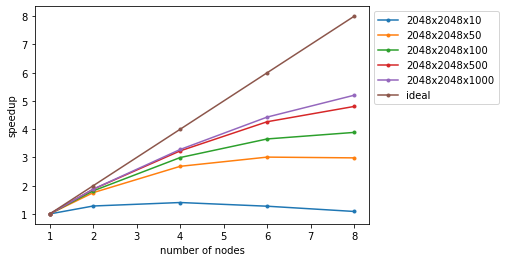

## Total time with 0.2quantile, 0.8quantile

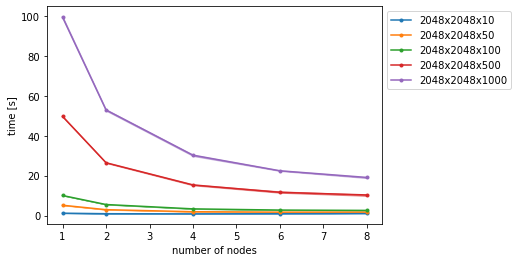

## Time as a function of image size and number of nodes

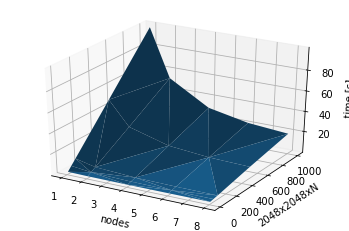

## Dataset read time

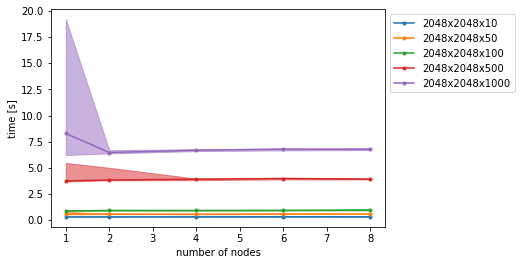

## Dataset write time

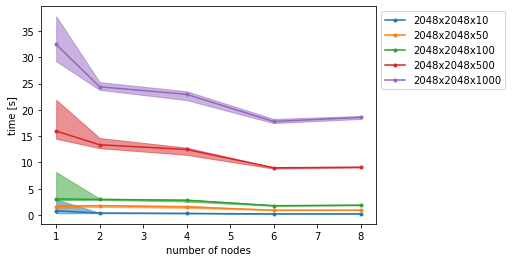

In [3]:
plot_common(data, algorithm=algorithm, method=method, legend=legend)